<a href="https://colab.research.google.com/github/GitSpace458/458repository/blob/main/Twitter_API_Access.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd
import re
from collections import Counter

In [3]:
API_KEY = "4B1I5jT5UCOiXUiicomqLlySh"
API_KEY_SECRET = "oNwGwEoaB8yXWtXmxtRuiGLjuWarQq8H4iZoJWlvxe5DtfBm8x"
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAKUk3QEAAAAAVLiuqCwpWYEE9CcnQ7iP1HgDDCw%3Diuk5IFS6RHnyAA0bXDfspL5lU3kJR3qdhsiWHsnAhXZk5rwdvN"

In [6]:
handle = "CommBank"
url = f"https://api.twitter.com/2/tweets/search/recent?query=from: {handle}&tweet.fields=created_at&expansions=author_id&user.fields=created_at"
headers = {"Authorization": "Bearer {}".format(BEARER_TOKEN)}

In [7]:
# 🔐 Insert your bearer token securely
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAKUk3QEAAAAAVLiuqCwpWYEE9CcnQ7iP1HgDDCw%3Diuk5IFS6RHnyAA0bXDfspL5lU3kJR3qdhsiWHsnAhXZk5rwdvN"  # Replace with your actual token

# 🛠️ Twitter API Endpoint and Parameters
handle = "CommBank"
url = f"https://api.twitter.com/2/tweets/search/recent"
params = {
    "query": f"from:{handle}",
    "tweet.fields": "created_at,text",
    "expansions": "author_id",
    "user.fields": "username",
    "max_results": 100  # Set to 100 for maximum retrieval
}
headers = {
    "Authorization": f"Bearer {BEARER_TOKEN}"
}

# 📡 Make the GET Request
response = requests.get(url, headers=headers, params=params)

# 🧾 Parse Response
if response.status_code == 200:
    tweets = response.json().get("data", [])
    df = pd.DataFrame(tweets)
    print(df.head())  # Display first few tweets
else:
    print(f"Request failed: {response.status_code}")
    print(response.text)

  author_id                   id                created_at  \
0  14787749  1949749811030462706  2025-07-28T08:32:34.000Z   
1  14787749  1949617717981634980  2025-07-27T23:47:40.000Z   
2  14787749  1949419220338696330  2025-07-27T10:38:55.000Z   
3  14787749  1949401453233307974  2025-07-27T09:28:19.000Z   
4  14787749  1949395813001724129  2025-07-27T09:05:54.000Z   

                                                text edit_history_tweet_ids  
0  @ImHerLover Hi James. Keeping your accounts sa...  [1949749811030462706]  
1  @mpearce_perth Hi Mark, our services have been...  [1949617717981634980]  
2  @mpearce_perth Hi there, sorry to hear you’re ...  [1949419220338696330]  
3  @bueschie Hi Ulrich. I'd like to know more abo...  [1949401453233307974]  
4  @RobLeong1 Hi Rob. I'm sorry to hear that. I h...  [1949395813001724129]  


In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [10]:
sia = SentimentIntensityAnalyzer()

In [11]:
# 🔍 Apply sentiment analysis
df["sentiment"] = df["text"].apply(lambda x: sia.polarity_scores(x)["compound"])

# 🏷️ Categorize sentiment
df["sentiment_label"] = df["sentiment"].apply(
    lambda score: "Positive" if score > 0.05 else ("Negative" if score < -0.05 else "Neutral")
)

# 📊 Summary insights
summary = df["sentiment_label"].value_counts().reset_index()
summary.columns = ["Sentiment", "Count"]

print("🔎 Sentiment Summary:")
print(summary)
print("\n📋 Detailed Sentiment Scores:")
print(df[["created_at", "text", "sentiment", "sentiment_label"]])

🔎 Sentiment Summary:
  Sentiment  Count
0  Positive      8
1   Neutral      2
2  Negative      1

📋 Detailed Sentiment Scores:
                  created_at  \
0   2025-07-28T08:32:34.000Z   
1   2025-07-27T23:47:40.000Z   
2   2025-07-27T10:38:55.000Z   
3   2025-07-27T09:28:19.000Z   
4   2025-07-27T09:05:54.000Z   
5   2025-07-27T02:24:24.000Z   
6   2025-07-27T02:19:39.000Z   
7   2025-07-24T04:00:32.000Z   
8   2025-07-24T03:55:36.000Z   
9   2025-07-23T12:20:42.000Z   
10  2025-07-23T05:11:09.000Z   

                                                 text  sentiment  \
0   @ImHerLover Hi James. Keeping your accounts sa...     0.1779   
1   @mpearce_perth Hi Mark, our services have been...     0.5719   
2   @mpearce_perth Hi there, sorry to hear you’re ...     0.3818   
3   @bueschie Hi Ulrich. I'd like to know more abo...     0.8625   
4   @RobLeong1 Hi Rob. I'm sorry to hear that. I h...     0.0258   
5   @blu_boys You can find more information on our...    -0.4939   
6   @blu_boy

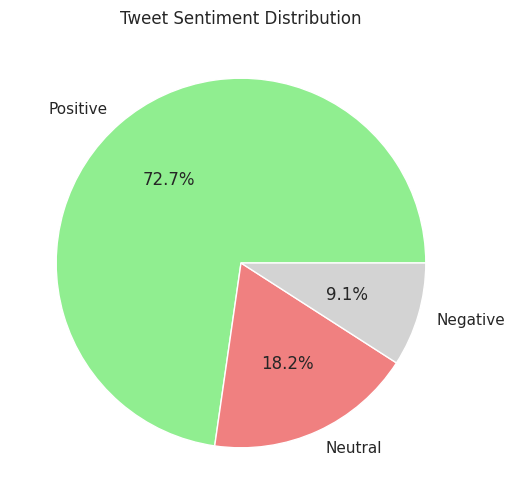

/tmp/ipython-input-12-1444928705.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='pastel')


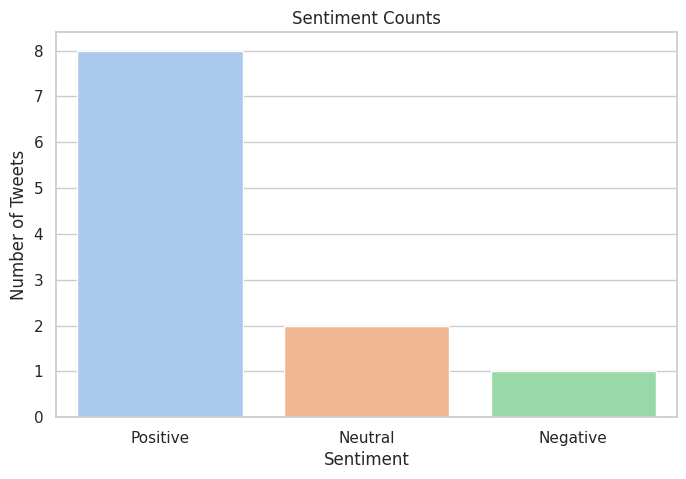

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 Set plot style
sns.set(style="whitegrid")

# 🥧 Pie Chart
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightgrey'])
plt.title('Tweet Sentiment Distribution')
plt.show()

# 📉 Bar Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=df, palette='pastel')
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


In [13]:
# ✅ Clean text and tokenize
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text.split()

# 🧹 Flatten and count words by sentiment label
word_counts = {
    label: Counter(
        word for text in df[df['sentiment_label'] == label]['text']
        for word in clean_text(text)
    ) for label in df['sentiment_label'].unique()
}

# 📦 Show top 5 words per sentiment label
for label, counter in word_counts.items():
    print(f"\n🔍 Top words in {label} tweets:")
    for word, count in counter.most_common(5):
        print(f"- {word}: {count}")



🔍 Top words in Positive tweets:
- you: 10
- to: 9
- your: 8
- with: 8
- hi: 7

🔍 Top words in Neutral tweets:
- you: 6
- to: 4
- hi: 2
- our: 2
- link: 2

🔍 Top words in Negative tweets:
- on: 3
- more: 2
- information: 2
- the: 2
- blu_boys: 1


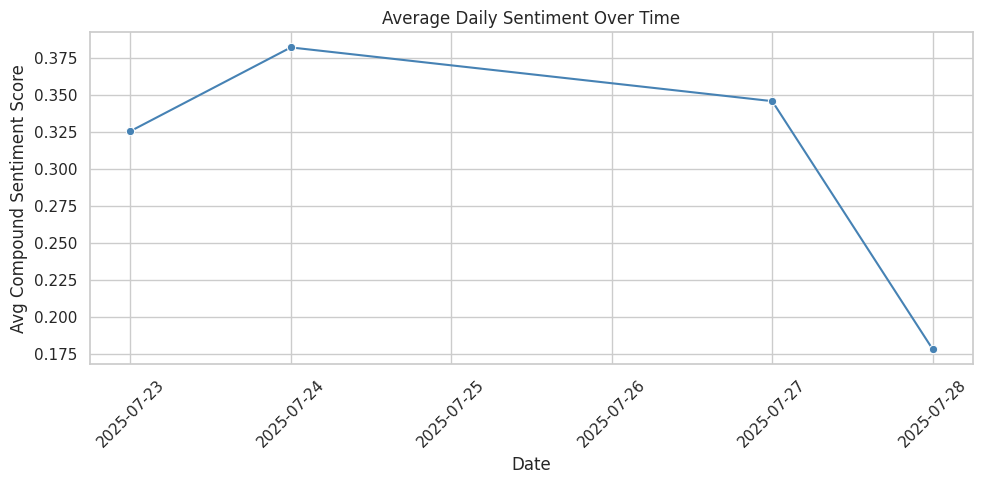

In [14]:
# ⏱️ Convert 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# 📊 Group by Date
daily_sentiment = df.groupby(df['created_at'].dt.date)['sentiment'].mean()

# 📈 Line plot of sentiment over time
plt.figure(figsize=(10, 5))
sns.lineplot(x=daily_sentiment.index, y=daily_sentiment.values, marker="o", color="steelblue")
plt.title('Average Daily Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Compound Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1]:
!pip uninstall emoji -y
!pip install emoji==1.7.0

Found existing installation: emoji 1.7.0
Uninstalling emoji-1.7.0:
  Successfully uninstalled emoji-1.7.0
  Using cached emoji-1.7.0-py3-none-any.whl


Request failed: 429
{"title":"Too Many Requests","detail":"Too Many Requests","type":"about:blank","status":429}

🎭 Emotion Breakdown:
emotion
Sad      5
Fear     5
Happy    1
Name: count, dtype: int64


/tmp/ipython-input-12-3619987328.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='coolwarm')


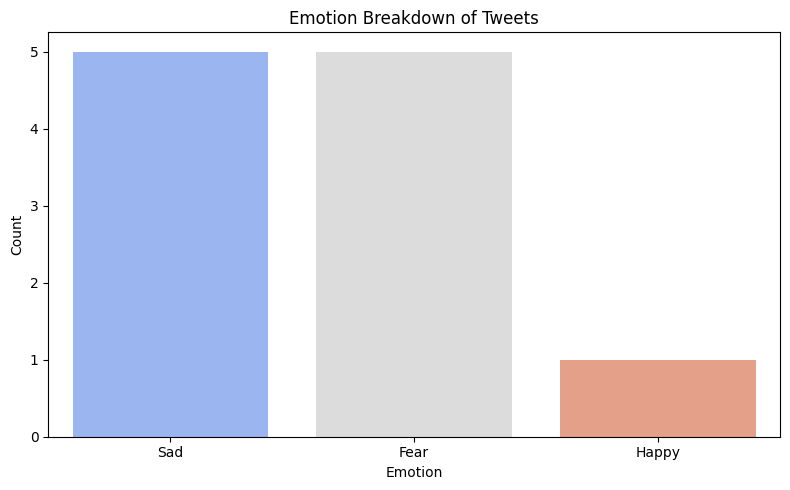

In [12]:
# ⬇️ Install first: pip install text2emotion
import text2emotion as te
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔐 Insert your bearer token securely
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAKUk3QEAAAAAVLiuqCwpWYEE9CcnQ7iP1HgDDCw%3Diuk5IFS6RHnyAA0bXDfspL5lU3kJR3qdhsiWHsnAhXZk5rwdvN"  # Replace with your actual token

# 🛠️ Twitter API Endpoint and Parameters
handle = "CommBank"
url = f"https://api.twitter.com/2/tweets/search/recent"
params = {
    "query": f"from:{handle}",
    "tweet.fields": "created_at,text",
    "expansions": "author_id",
    "user.fields": "username",
    "max_results": 100  # Set to 100 for maximum retrieval
}
headers = {
    "Authorization": f"Bearer {BEARER_TOKEN}"
}

# 📡 Make the GET Request
response = requests.get(url, headers=headers, params=params)

# 🧾 Parse Response
if response.status_code == 200:
    tweets = response.json().get("data", [])
    df = pd.DataFrame(tweets)
    print(df.head())  # Display first few tweets
else:
    print(f"Request failed: {response.status_code}")
    print(response.text)


# 🔍 Extract dominant emotion from each tweet
df['emotion'] = df['text'].apply(lambda x: max(te.get_emotion(x), key=te.get_emotion(x).get))

# 📊 Summary of emotions
emotion_counts = df['emotion'].value_counts()
print("\n🎭 Emotion Breakdown:")
print(emotion_counts)

# 🧁 Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='coolwarm')
plt.title('Emotion Breakdown of Tweets')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.tight_layout()
plt.show()